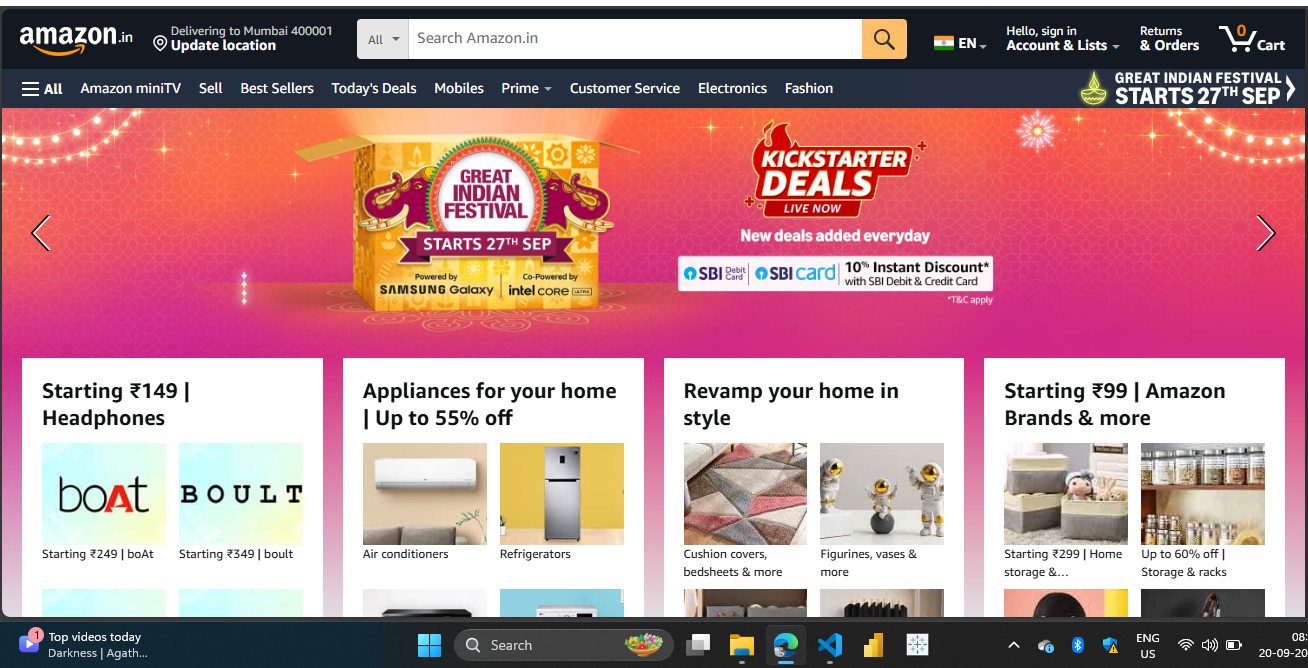

`Amazon` is one of the largest e-commerce platforms globally, offering a vast range of products and services. Customers frequently leave reviews, providing feedback on their purchasing experiences, product quality, and service satisfaction. These reviews contain valuable insights into customer sentiments whether positive, negative or neutral. Sentiment analysis on Amazon reviews helps businesses understand customer preferences, improve their products, and enhance overall customer satisfaction. By analyzing the sentiment of these reviews, companies can make data-driven decisions to refine their offerings and meet customer needs more effectively.

In this project, I analyzed customer reviews from Amazon to determine the overall sentiment positive, negative, or neutral toward various products. By applying sentiment analysis techniques, I aimed to extract meaningful insights from these reviews, helping businesses better understand customer satisfaction and preferences. This analysis can guide improvements in product quality, customer service, and overall shopping experience, enabling data-driven decisions that benefit both the company and its customers.

### *Introduces the section for importing libraries*

In [1]:
# Imports essential libraries like pandas, numpy, and plotly
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

### *Introduces the section on data collection and analysis*

In [2]:
# Loads the dataset using pandas and displays the first 3 rows
df = pd.read_csv("C:\\Users\\DELL\\Documents\\Data Science\\CSV\\amazon_reviews.csv")
print(df.head(3))

                               reviewId            userName  \
0  bec2adfd-5f15-42bd-adfa-56a7f0ff62df  Marcello Giuffrida   
1  9b6cc637-fd32-4866-abc4-f73eb4c1598c        Leila Hegazy   
2  99232b30-3259-468f-b285-65dd7b918ebb           Kirstie D   

                                             content  score  thumbsUpCount  \
0                                            Amazing      5              0   
1  اصبح سيء جدا سوق دوت كوم كان افضل الف مرة لا خ...      1              0   
2           I do not like the new updated app at all      3              0   

  reviewCreatedVersion                at   appVersion  
0            6.8.0.100  17-09-2024 16:19    6.8.0.100  
1           28.3.0.100  17-09-2024 15:56   28.3.0.100  
2          28.17.0.100  17-09-2024 15:50  28.17.0.100  


In [3]:
# Displays the data information such as column types and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61099 entries, 0 to 61098
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              61099 non-null  object
 1   userName              61094 non-null  object
 2   content               61095 non-null  object
 3   score                 61099 non-null  int64 
 4   thumbsUpCount         61099 non-null  int64 
 5   reviewCreatedVersion  54767 non-null  object
 6   at                    61099 non-null  object
 7   appVersion            54767 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.7+ MB
None


*In this info show about the data's information like Data Type, Non-Null, etc. So we can check understand easily how much data accupied in our dataset. We can cross check further more steps about null values.*

In [4]:
# To check null values
print(df.isnull().sum())

reviewId                   0
userName                   5
content                    4
score                      0
thumbsUpCount              0
reviewCreatedVersion    6332
at                         0
appVersion              6332
dtype: int64


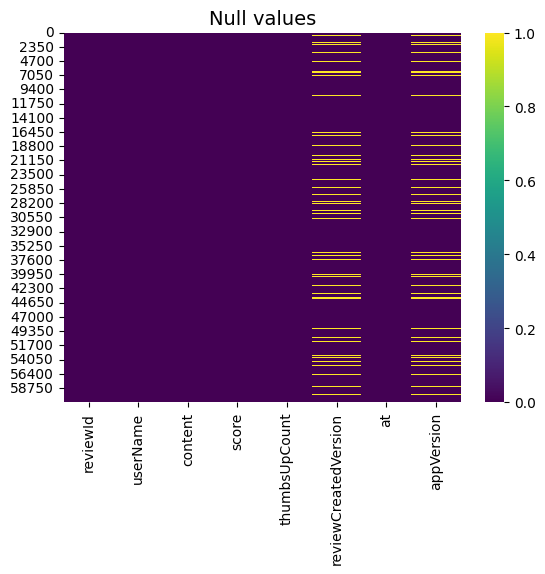

In [5]:
# View null values by visualization
sns.heatmap(df.isnull(),cmap='viridis')
plt.title('Null values', fontsize=14)
plt.show()

*Here we can see easily which column have more null values through visualization. In this cenario i focused only for predict the text analysis. So i don't spend time to fill these columns, i just drop it.*

### *Data Cleaning*

In [6]:
# Removed unwanted columns
df = df.drop(columns=['reviewCreatedVersion','appVersion','reviewId','userName','at','thumbsUpCount'],axis=1)
print(df.head())

                                             content  score
0                                            Amazing      5
1  اصبح سيء جدا سوق دوت كوم كان افضل الف مرة لا خ...      1
2           I do not like the new updated app at all      3
3  The app overall is great from past experience....      1
4            I love the convince of Amazon shopping.      5


In [7]:
# delete the null values
df = df.dropna(how='any')
print(df.head())

                                             content  score
0                                            Amazing      5
1  اصبح سيء جدا سوق دوت كوم كان افضل الف مرة لا خ...      1
2           I do not like the new updated app at all      3
3  The app overall is great from past experience....      1
4            I love the convince of Amazon shopping.      5


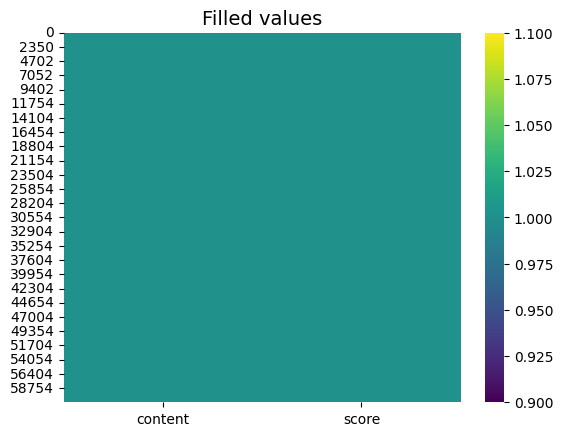

In [8]:
# View null values by visualization
sns.heatmap(df.notnull(),cmap='viridis')
plt.title('Filled values', fontsize=14)
plt.show()

*Here we can see after filled the null values. So we do our further process without any interruption.*

In [9]:
# Check duplicates count
print(df.duplicated().sum())

1073


*Here i got 1073 duplicate data's, so i delete it all duplicate data's*

In [10]:
# Drop duplicates
df = df.drop_duplicates()
print(df)

                                                 content  score
0                                                Amazing      5
1      اصبح سيء جدا سوق دوت كوم كان افضل الف مرة لا خ...      1
2               I do not like the new updated app at all      3
3      The app overall is great from past experience....      1
4                I love the convince of Amazon shopping.      5
...                                                  ...    ...
61094  Amazon Smile donates. Make sure you get all se...      5
61095  After having problems with the app and having ...      5
61096  Used to be great. Got greedy, they ruined the ...      1
61097  New search bar location sucks. At least give m...      2
61098  for me personally I use Amazon prime due to be...      5

[60022 rows x 2 columns]


### *View Data's Trend by Visualization*

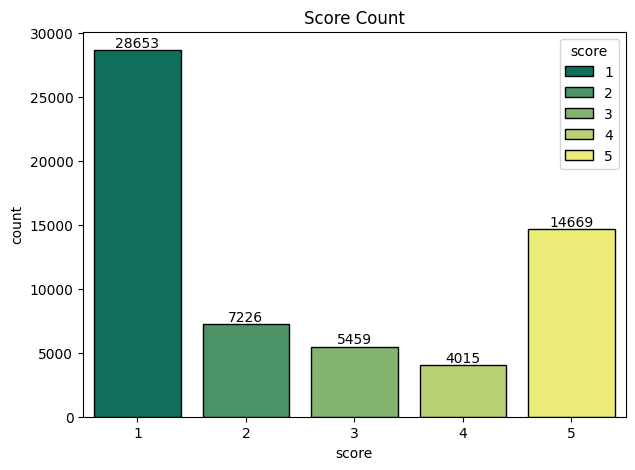

In [11]:
# Check score count by visualization
plt.figure(figsize=(7,5))
count = sns.countplot(data=df,x='score',hue='score',edgecolor='black',palette='summer')
count.bar_label(count.containers[0])
count.bar_label(count.containers[1])
count.bar_label(count.containers[2])
count.bar_label(count.containers[3])
count.bar_label(count.containers[4])
plt.title('Score Count')
plt.show()

*Here I check the score count via countplot. So we can able to understand quickly which score/Ratings are lead in this cenario. And we can guess before which will be take lead in our Sentiment Analysis.*

In [12]:
# check score percentage using pie chart
scores= df['score'].value_counts()
fig = px.pie(scores,values=scores,names=scores.index,title='Score Percentage Variation',height=400,width=500,template='plotly_dark')
fig.show()

*Here I plot a Pie chart for percentage visualization people's score. Perticularly this "1 Star Rating" is take lead around 47%. It means behalf of the person didn't like our products or service or etc. So we can come to conclution for take decition to reduce customer's unsatisfaction.*

### *Creat a Sentiment Column Based on Score*

In [13]:
# Create a sentiment column based on score
a = df['score']
def sentiment(a):
  if a > 3:
    return 'Positive'
  elif a == 3:
    return 'Neutral'
  else:
    return 'Negative'

df['sentiment'] = df['score'].apply(sentiment)
print(df.head())

                                             content  score sentiment
0                                            Amazing      5  Positive
1  اصبح سيء جدا سوق دوت كوم كان افضل الف مرة لا خ...      1  Negative
2           I do not like the new updated app at all      3   Neutral
3  The app overall is great from past experience....      1  Negative
4            I love the convince of Amazon shopping.      5  Positive


*Here i create a sentiment column based on score column. In score column 1 and 2 is consider as "Negative". 3 is consider as "Neutral". And 4, 5 is consider as "Negative". So we can able to do text process easily.*

### *View Sentiment Review Count Through Visualization*

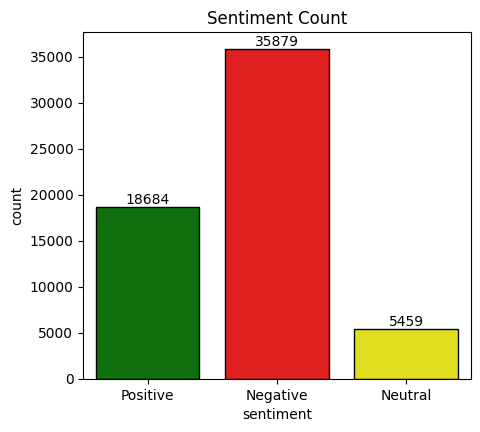

In [14]:
# Check the sentiment count
bar_chart = plt.figure(figsize=(5,4.5))
sentiment_chart = sns.countplot(data=df,x='sentiment',edgecolor='black',
                                palette={'Positive':'green','Neutral':'yellow','Negative':'red'},
                                hue='sentiment',legend=False)
sentiment_chart.bar_label(sentiment_chart.containers[0])
sentiment_chart.bar_label(sentiment_chart.containers[1])
sentiment_chart.bar_label(sentiment_chart.containers[2])
plt.title('Sentiment Count')
plt.show()

*In this chart showing *Negative* is very high. So we expect we got huge negative review like.*

In [15]:
colors = ('red','green','#511CFB')
tags = df['sentiment'].value_counts()
sentiment_pie = px.pie(tags,values=tags,names=tags.index,title='Sentiment Percentage Variation',
                       height=400,width=500,color_discrete_sequence=colors,template='plotly_dark')
sentiment_pie.show()

*This pie chart showing more than 50% is accupied negative review*

### *Cleaning And Tokenizing The String Data With The Help of re and NLP(ML)*

In [16]:
from sys import flags
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

def processing(text):
  text = df['content'].str.lower()
  url_pattern = re.sub(r'https?://\S+|www\.\S+','',text,flags=re.MULTILINE)
  punc_pattern = re.sub(r'[^\w\s]','',url_pattern)
  special_char_pattern = re.sub(r'[^a-zA-Z0-9\s]','',punc_pattern)
  special_char_pattern = re.sub(r'\@W+|\#',' ',special_char_pattern)
  text_tokens = word_tokenize(special_char_pattern)
  stop_words = set(stopwords.words('english'))
  filtered_text = [word for word in text_tokens if word not in stop_words]
  return ' '.join(filtered_text)

*To clean the text data like removing special charecters, URL, https, etc. seprate reviews by word by word.*

### *Filter The Positive Review And Plot The Positive Review Wordcloud*

In [17]:
positive_result = df[df.sentiment == 'Positive']
print(positive_result.head())

                                              content  score sentiment
0                                             Amazing      5  Positive
4             I love the convince of Amazon shopping.      5  Positive
10                                        Easy to use      5  Positive
18  Amazon is my favorite company. I really love A...      5  Positive
19  Is it possible to customise the highlight colo...      4  Positive


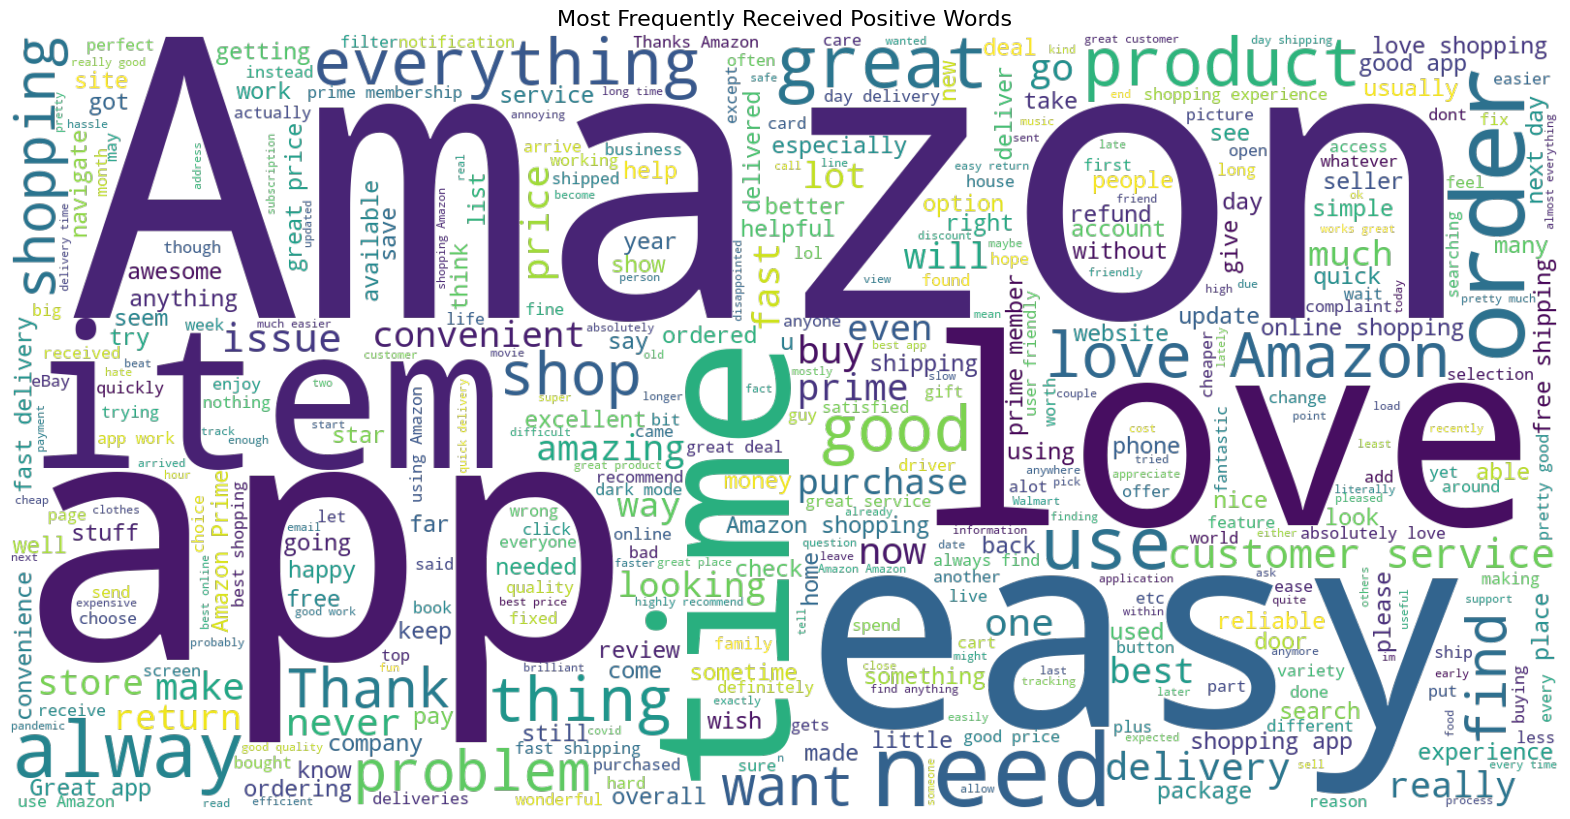

In [18]:
# Filter the Positive result for take workcloud image.
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

text = ' '.join([word for word in positive_result['content']])
plt.figure(figsize=(20,16))
wordcloud = WordCloud(max_words=400,background_color=None,height=800,width=1600, mode='RGBA').generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequently Received Positive Words', fontsize=16)
plt.show()

*Here the Positive wordcloud image. In this image showing which positive words most frequently received in this dataset. And we can find which area is works very well in the organization like.*

### *Filter The Neutral Review And Plot The Neutral Review Wordcloud*

In [19]:
neutral_result = df[df.sentiment == 'Neutral']
print(neutral_result.head())

                                              content  score sentiment
2            I do not like the new updated app at all      3   Neutral
31  it's a good app except for the fact that they ...      3   Neutral
56  The update layout is horrible. There are too m...      3   Neutral
68  Too hard to navigate, no dark mode. I would do...      3   Neutral
71  Good website, good products, good delivery ser...      3   Neutral


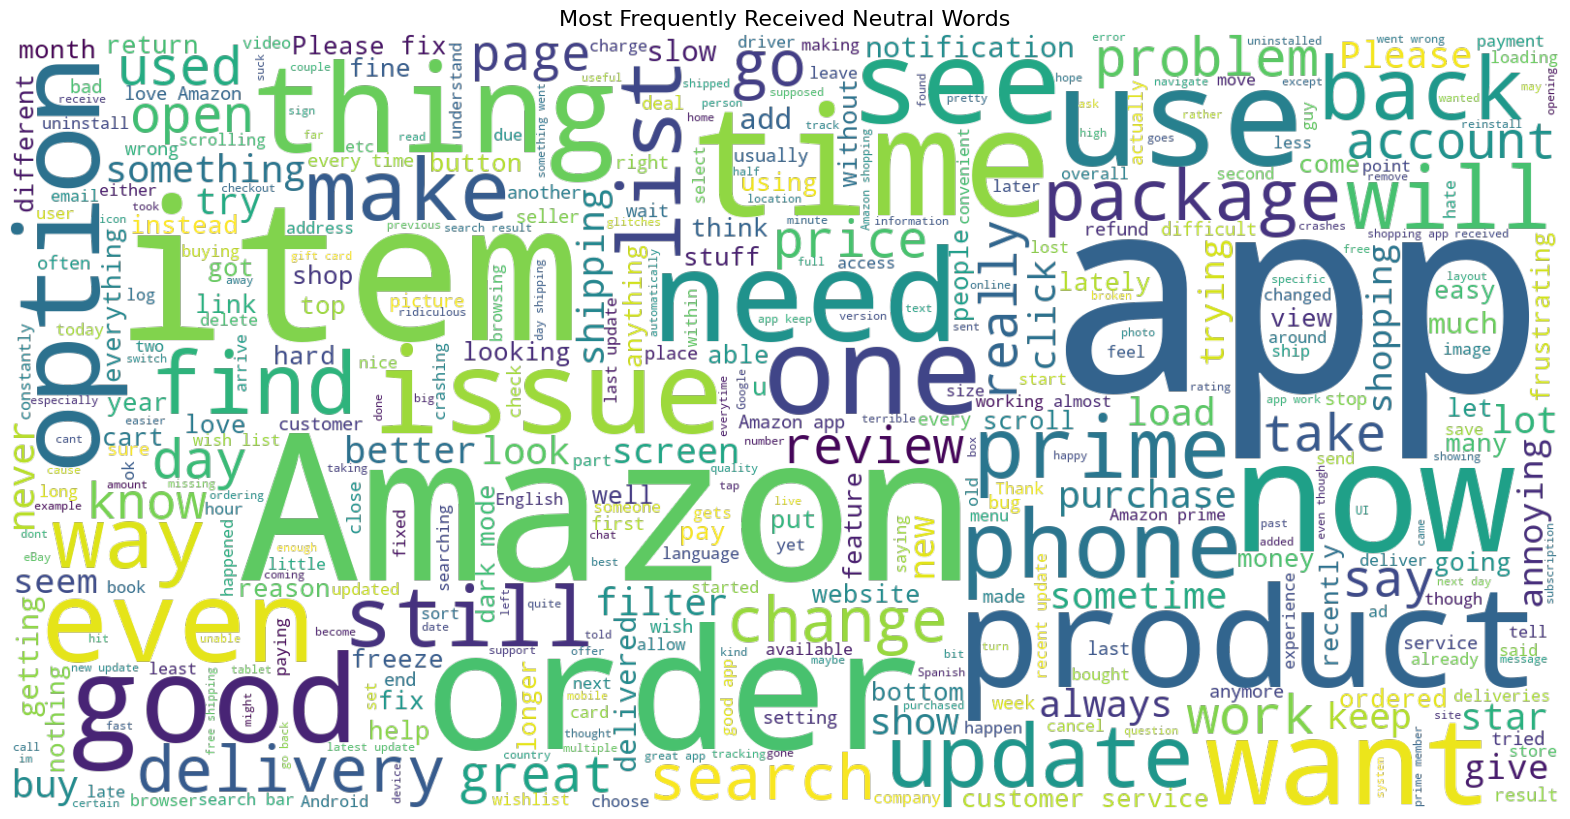

In [20]:
# Filter the Neutral result for take workcloud image.
text= ' '.join([word for word in neutral_result['content']])
plt.figure(figsize=(20,16))
wordcloud = WordCloud(max_words=400,background_color=None,mode='RGBA',height=800,width=1600).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequently Received Neutral Words', fontsize=16)
plt.show()

*Here the Neutral wordcloud image. In this image showing which Neural words most frequently received in this dataset. Neutral words are not completly depending on under any positive words or negative words. it is like nothing any drawback and appriciation.*

### *Filters the dataset to display negative reviews and prints the result*

In [21]:
negative_result = df[df.sentiment == 'Negative']
print(negative_result.head())

                                             content  score sentiment
1  اصبح سيء جدا سوق دوت كوم كان افضل الف مرة لا خ...      1  Negative
3  The app overall is great from past experience....      1  Negative
5  This update sucks! You can't view certain pict...      1  Negative
6  They sent me hurtful email saying they deleted...      1  Negative
7  Whoever's idea it was to make a super bright w...      1  Negative


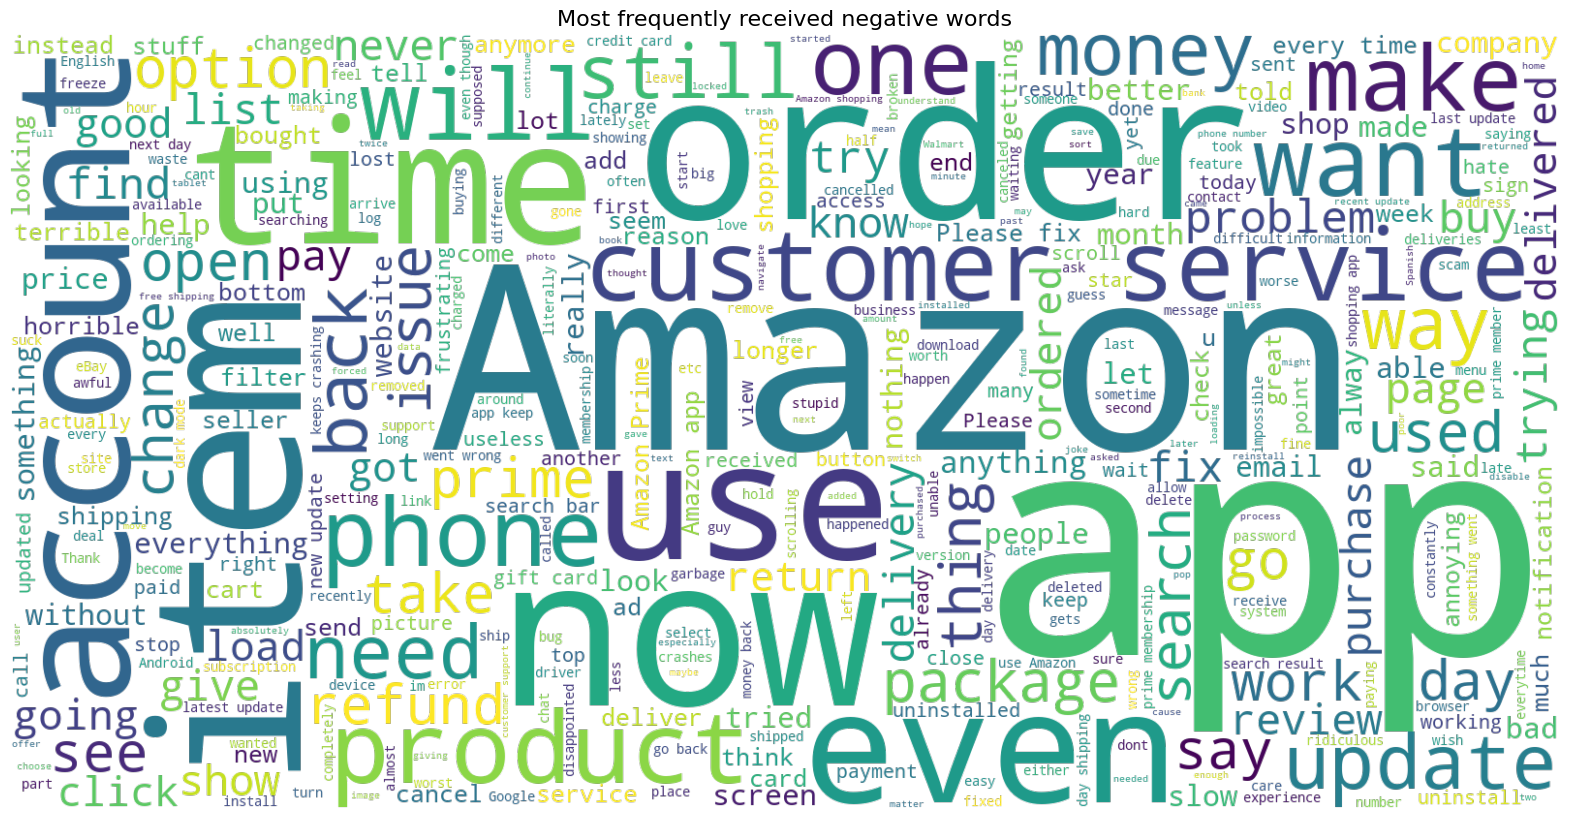

In [22]:
# Generates a word cloud of negative review words
text = ' '.join([word for word in negative_result['content']])
plt.figure(figsize=(20,16))
wordcloud = WordCloud(max_words=400,background_color=None,mode='RGBA',height=800,width=1600).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequently received negative words', fontsize=16)
plt.show()

*Describes how the negative word cloud helps identify the most frequent complaints in the reviews.*

### *Introduces feature extraction using CountVectorizer*

In [23]:
# Applies CountVectorizer to extract n-grams from the review content.
from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer(ngram_range=(1,2)).fit(df['content'])
print(vector)

CountVectorizer(ngram_range=(1, 2))


In [24]:
# Displays the first 20 features extracted by CountVectorizer.
feature_names = vector.get_feature_names_out()
print('Number of features: {}\n'.format(len(feature_names)))
print('First 20 features:\n{}'.format(feature_names[:20]))

Number of features: 462405

First 20 features:
['00' '00 2nd' '00 am' '00 am_pm' '00 amazon' '00 an' '00 and' '00 any'
 '00 back' '00 balance' '00 because' '00 books' '00 brought' '00 buck'
 '00 bucks' '00 but' '00 by' '00 charge' '00 coupon' '00 credit']


### *Introduces logistic regression for sentiment prediction and accuracy checking*

In [28]:
# Imports libraries for model evaluation and performance metrics
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression

In [29]:
# Prepares data for logistic regression
x = df['content']
y = df['sentiment']
x =vector.transform(x)

In [30]:
# Splits the data into training and testing sets using train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [31]:
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy: {:.2f}%'.format(accuracy*100))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print('Classification Report:\n',classification_report(y_test,y_pred))

Accuracy: 83.21%
Confusion Matrix:
 [[9938  296  532]
 [1080  215  346]
 [ 603  166 4831]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.86      0.92      0.89     10766
     Neutral       0.32      0.13      0.19      1641
    Positive       0.85      0.86      0.85      5600

    accuracy                           0.83     18007
   macro avg       0.67      0.64      0.64     18007
weighted avg       0.80      0.83      0.81     18007



*Discusses achieving above 80% accuracy with logistic regression, which is sufficient to guide decisions for improving services.*